In [29]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [37]:
epi_0 = pd.read_csv('epistasis_0.csv')
epi_1 = pd.read_csv('epistasis_1.csv')
epi_2 = pd.read_csv('epistasis_2.csv')

### Average Slope Values

In [24]:
print('No epistasis')
print('mean: ' + str(epi_0['Slope'].mean()))
print('standard deviation: ' + str(epi_0['Slope'].std()) + '\n')

print('First-order epistasis')
print('mean: ' + str(epi_1['Slope'].mean()))
print('standard deviation: ' + str(epi_1['Slope'].std()) + '\n')

print('Second-order epistasis')
print('mean: ' + str(epi_2['Slope'].mean()))
print('standard deviation: ' + str(epi_2['Slope'].std()) + '\n')

No epistasis
mean: 44061.70168433273
standard deviation: 13901.46498908318

First-order epistasis
mean: 33640.605546205836
standard deviation: 13918.629919957151

Second-order epistasis
mean: 22337.105762634237
standard deviation: 17234.12361167496



### Proportion of Polymorphic Simulations

In [25]:
print('No epistasis')
print(str(np.sum(epi_0['Polymorphism']) / len(epi_0['Polymorphism'])) + '\n')

print('First-order epistasis')
print(str(np.sum(epi_1['Polymorphism']) / len(epi_1['Polymorphism'])) + '\n')

print('Second-order epistasis')
print(str(np.sum(epi_2['Polymorphism']) / len(epi_2['Polymorphism'])) + '\n')

No epistasis
0.297

First-order epistasis
0.366

Second-order epistasis
0.415



### Proportion of Pareto Genotypes with ESS

In [26]:
prop_0 = np.sum(epi_0['Invasion Genotypes: Pareto'] < 1) / epi_0.shape[0]
prop_1 = np.sum(epi_1['Invasion Genotypes: Pareto'] < 1) / epi_1.shape[0]
prop_2 = np.sum(epi_2['Invasion Genotypes: Pareto'] < 1) / epi_2.shape[0]


print('No epistasis')
print(str(prop_0) + '\n')

print('First-order epistasis')
print(str(prop_1) + '\n')

print('Second-order epistasis')
print(str(prop_2) + '\n')

No epistasis
0.673

First-order epistasis
0.605

Second-order epistasis
0.569



### Proportion of Interpolated Genotypes with ESS

In [27]:
prop_0 = np.sum(epi_0['Invasion Genotypes: Interp'] < 2) / epi_0.shape[0]
prop_1 = np.sum(epi_1['Invasion Genotypes: Interp'] < 2) / epi_0.shape[0]
prop_2 = np.sum(epi_2['Invasion Genotypes: Interp'] < 2) / epi_0.shape[0]


print('No epistasis')
print(str(prop_0) + '\n')

print('First-order epistasis')
print(str(prop_1) + '\n')

print('Second-order epistasis')
print(str(prop_2) + '\n')

No epistasis
0.956

First-order epistasis
0.83

Second-order epistasis
0.714



### Probability of Interpolated Polymorphism Given Pareto Polymorphism

In [28]:
candidates_0 = epi_0['Invasion Genotypes: Interp'][epi_0['Invasion Genotypes: Pareto'] > 1]
prop_0 = len(candidates_0[candidates_0 > 1]) / len(candidates_0)

candidates_1 = epi_1['Invasion Genotypes: Interp'][epi_1['Invasion Genotypes: Pareto'] > 1]
prop_1 = len(candidates_1[candidates_1 > 1]) / len(candidates_1)

candidates_2 = epi_2['Invasion Genotypes: Interp'][epi_2['Invasion Genotypes: Pareto'] > 1]
prop_2 = len(candidates_2[candidates_2 > 1]) / len(candidates_2)

print('No epistasis')
print(str(prop_0) + '\n')

print('First-order epistasis')
print(str(prop_1) + '\n')

print('Second-order epistasis')
print(str(prop_2) + '\n')

No epistasis
0.12781954887218044

First-order epistasis
0.3905325443786982

Second-order epistasis
0.6129032258064516



### Slope-Polymorphism Relationship

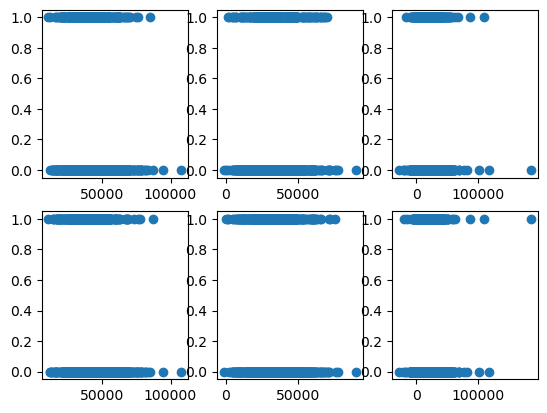

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=3)

AD_poly1 = np.array(epi_0['Invasion Genotypes: Interp'])
AD_poly1[AD_poly1 >= 1] = 1
AD_poly1[AD_poly1 < 1] = 0

AD_poly2 = np.array(epi_0['Invasion Genotypes: Interp'])
AD_poly2[AD_poly2 >= 1] = 1
AD_poly2[AD_poly2 < 1] = 0

AD_poly3 = np.array(epi_0['Invasion Genotypes: Interp'])
AD_poly3[AD_poly3 >= 1] = 1
AD_poly3[AD_poly3 < 1] = 0

ax[0,0].scatter(epi_0['Slope'], AD_poly1)
ax[0,1].scatter(epi_1['Slope'], AD_poly2)
ax[0,2].scatter(epi_2['Slope'], AD_poly3)

P_poly1 = np.array(epi_0['Invasion Genotypes: Pareto'])
P_poly1[P_poly1 >= 1] = 1
P_poly1[P_poly1 < 1] = 0

P_poly2 = np.array(epi_0['Invasion Genotypes: Pareto'])
P_poly2[P_poly2 >= 1] = 1
P_poly2[P_poly2 < 1] = 0

P_poly3 = np.array(epi_0['Invasion Genotypes: Pareto'])
P_poly3[P_poly3 >= 1] = 1
P_poly3[P_poly3 < 1] = 0

ax[1,0].scatter(epi_0['Slope'], P_poly1)
ax[1,1].scatter(epi_1['Slope'], P_poly2)
ax[1,2].scatter(epi_2['Slope'], P_poly3)

In [45]:
AD_poly = np.array(epi_0['Invasion Genotypes: Interp'])


In [47]:
AD_poly[AD_poly > 1] = 999

In [48]:
AD_poly

array([  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 999.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
         0., 999.,   0.,   1., 999.,   1.,   0.,   0.,   0.,   0.,   0.,
       999., 999.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
         1.,   0.,   0., 999.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
         0.,   0.,   1.,   0.,   1.,   1., 999.,   0.,   0., 999.,   0.,
         0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
         0., 999.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
         0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   1.,   0.,   0.,   